# RNN for 'Open' price timeseries prediction
- RNN network is recurrent neural network, which works as , it saves the output of particular layer and send it to input or features in order to predict the target/output. Here, it fits the condition of our data, as in our data the the output of 1 day next is  calculated based on the data of past three days.
- RNN models are best for time series predction.
- Here, we will use Long Short-Term Memory network , also known as LSTM , for the future ' Open' price prediction. LSTM  has the capability of learning the dependencies of long time of previous fed data by remembering them . They have chain like structure  and instead of using single layer neural network, it uses combination.
- In our model, LSTM fulfil all the requirements , to predict the next day 'Open' Price. Thus, we will use it .
- With LSTM , we can even predict for more days as it has great capacity in remembering.
- RNN is a solution to feed forward neural networks.
- Data descrition: the data consists of six columns namely 'Open', 'Close' , 'High', 'Low', 'Volume', 'Date' and 1259 rows. Below are some graphs which will show columns nature with respect to time. Here, aim is to predict the next day 'Open' price based on previous three days data. Also, in our case we will use only fours features discardig 'Close' column.

In [497]:
# importing neccessary liberaries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data:

In [498]:
data= pd.read_csv('data/q2_dataset.csv')
df= data.copy()

### Plotting of features:

<AxesSubplot:xlabel='Date'>

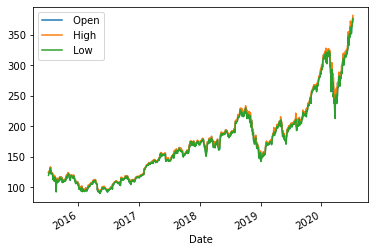

In [499]:
df1 =  data.copy()
df1['Date']= pd.to_datetime(df1['Date'])
df1.set_index("Date",inplace=True)
df_plot1=df1.iloc[:,2:].tail(1300)
df_plot1.plot.line()

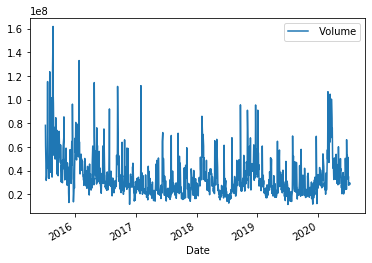

In [500]:
df_plot2=df1.iloc[:,1].head(1300)
df_plot2.plot.line()
plt.legend()

## Creating dataset with 3*4 features(past 3 days * 4 data columns):
Here, we are given six features, namely, 'Date','Close','Open','Volume','High','Low'. Among these features , the aim is to predict the 'Open' price of one day in future using the data of past three days.

Thus, to create a particular dataset, following steps are require,
- In order to do so, the two lists will be generated and then they will be iterated through the range starting from the past days ,till the length of days , one less future day to be predicted . As, our data is in ascending order .Thus  1 will be added else, it would be subtracted.

- In the loop, the first generated list 'x' will append all the values having last three days data and features , which would make it 3-D numpy array.

- Another list 'y' will contain all the one day in future 'Open' Price values of 'x' list feature and date.

- this function , thus, will return two arrays respresenting feature and target for our model.

This, is how the dataset will be created.

In [501]:
# Future day whose price is to be predicted
future_day=1
# Count of past days on basis of which target is to be predicted
past_days=3
#Function that returns the feature and target arrays for RNN model
def create_data(df,past_days,future_day):
    x, y =[],[]
    for i in range(past_days, len(df)-future_day+1):
        x.append(df.iloc[i-past_days:i,0:df.shape[1]])
        y.append(df.iloc[i+future_day-1:i+future_day,3])
    return np.array(x),np.array(y)
x_data , y_data = create_data(df,past_days,future_day)

### Splitting data:

In [502]:
# Randomization and Train_test_split of data
x_train , x_test , y_train ,y_test =train_test_split(x_data,y_data,test_size=0.3, random_state=42)

## Preprocessing the data:

- During preprocessing of this data , we need four features of past three days  and those four features include 'Open','Volume','Low' and 'High'.
- Thus, we will keep  these features and remove others . Although the 'Date' column here acts as the index .So, either it should be set as index or remocved.
- Then, to be sure , we converted all the values as float type , suitable to fit in model.
- Then the most important part 'Standard Scaler' is used to scale the values in particular range . else , it would give geat loss and least accuracy while training the network.
- For x_train or x_test data, preprocess function is made , whereas , for y_train and y_test data scale function is made.
- in features preprocessing , as the numpy array is 3-D , thus reshaping is done during scaling the values.
- However, for target , only scaling of 2-D is required.

In [503]:
# Function that returns Preprocessed Data
def preprocess(df):
    #Close column is not required, so, dropping it
    df= np.delete(df,1,axis=2)
    
    # Also, date column is here acts as index and not required among 3*4 features ,so, dropping it
    df= np.delete(df,0,axis=2)
    
    # Converting all remaining feature values to float
    df=df.astype(float)
    
    # Standard scaler for 3-D data
    scale= StandardScaler()
    scale_df= scale.fit_transform(df.reshape(-1,df.shape[-1])).reshape(df.shape)
    return scale_df

# Function that return scaled data for 2-D
def scale(df):
    scale= StandardScaler()
    df= scale.fit_transform(df)
    return df

### Preprocessing training data:

In [504]:
# Getting preprocessed data for x_train
x_train = preprocess(x_train)
# Getting scaled data for y_train
y_train = scale(y_train)

## Building model:

## All Design steps:
To design following steps are required;
- First the model is generated through sequential
- Then An LsTM  layer is added with number of units as 64 , activation function as 'relu' and input shape as 3*4(features)
- After this, another layer of LSTM is added with 32 no. of units and same activation function. But, this time it doies not return any sequences.
- then a dropout layer is added, also known as Dropout regularization to drop some elements of data for its better fitting and prediction.Here, 0.2 provided better results among all.
- Atlast  the Dense output layer is added with 1 unit or to provide same dimension as the target.
- then the model is compiled and its loss is calculated. here, we are using mean squared error to calculate loss with 'adam' optimizer. Also, as this is regression model , thus we cannot calculate accyracy through compilation , unlike loss.
- Atlast , model summary provided a sneak peek into how the layers will behave inside with their dimensions.

So, this is how our optimal model is designed.


In [529]:
# Building model with 4 layers 
model=Sequential()
model.add(LSTM(64,activation='relu',input_shape=(x_train.shape[1],x_train.shape[2]),return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))
model.compile(loss='mse',optimizer='adam')
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 3, 64)             17664     
_________________________________________________________________
lstm_89 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_46 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


### Training model:

## Architecture of network:
- In this LSTM model we used , the preprocessed and splitted data with feature and target arrays. 
- As, per the epochs , 10 can be used to show that where the model converges. the less the loss, the more accurate will be the predictions. Although, adding more number of epochs will provide even less loss, but , then it will become the case of overfitting. So, 100 epochs are used, with 3 iterations.
- Then, the batch_size is used as 32 , because using 64 or above converge a little late and on more number of epochs. Although, 32 is said to be good batch size for training small models.
- Verbose here is used as 2. it didnt made much difference vem if set to 0 and 1. They are the called as the total count of steps before prediction round finished declaration.

In [530]:
# Returns the loss of training data with every epoch
history=model.fit(x_train,y_train,epochs=10,batch_size=32,verbose=2)

Epoch 1/10
28/28 - 145s - loss: 0.7853
Epoch 2/10
28/28 - 1s - loss: 0.1724
Epoch 3/10
28/28 - 1s - loss: 0.0636
Epoch 4/10
28/28 - 0s - loss: 0.0485
Epoch 5/10
28/28 - 0s - loss: 0.0416
Epoch 6/10
28/28 - 0s - loss: 0.0384
Epoch 7/10
28/28 - 0s - loss: 0.0357
Epoch 8/10
28/28 - 0s - loss: 0.0313
Epoch 9/10
28/28 - 0s - loss: 0.0350
Epoch 10/10
28/28 - 0s - loss: 0.0300


### Plotting the training data model loss:

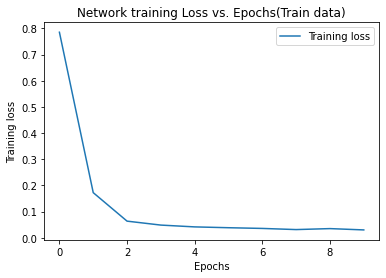

In [531]:
plt.plot(history.history['loss'],label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Network training Loss vs. Epochs(Train data)')
plt.legend()
plt.show()

#### Final loss :

In [517]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
28/28 - 0s - loss: 0.0180
Epoch 2/100
28/28 - 0s - loss: 0.0174
Epoch 3/100
28/28 - 0s - loss: 0.0204
Epoch 4/100
28/28 - 0s - loss: 0.0197
Epoch 5/100
28/28 - 0s - loss: 0.0203
Epoch 6/100
28/28 - 0s - loss: 0.0205
Epoch 7/100
28/28 - 0s - loss: 0.0220
Epoch 8/100
28/28 - 0s - loss: 0.0203
Epoch 9/100
28/28 - 0s - loss: 0.0231
Epoch 10/100
28/28 - 0s - loss: 0.0194
Epoch 11/100
28/28 - 0s - loss: 0.0202
Epoch 12/100
28/28 - 0s - loss: 0.0191
Epoch 13/100
28/28 - 0s - loss: 0.0207
Epoch 14/100
28/28 - 0s - loss: 0.0178
Epoch 15/100
28/28 - 0s - loss: 0.0230
Epoch 16/100
28/28 - 0s - loss: 0.0222
Epoch 17/100
28/28 - 0s - loss: 0.0202
Epoch 18/100
28/28 - 0s - loss: 0.0205
Epoch 19/100
28/28 - 0s - loss: 0.0214
Epoch 20/100
28/28 - 0s - loss: 0.0224
Epoch 21/100
28/28 - 0s - loss: 0.0219
Epoch 22/100
28/28 - 0s - loss: 0.0213
Epoch 23/100
28/28 - 0s - loss: 0.0174
Epoch 24/100
28/28 - 0s - loss: 0.0200
Epoch 25/100
28/28 - 0s - loss: 0.0210
Epoch 26/100
28/28 - 0s - loss: 0.

In [518]:
print('The final loss of network is: ',history.history['loss'][-1])

The final loss of network is:  0.020050106570124626


## Output of training loop:
Here, the loss decreases significantly , from 0.6 to 0.0200 .After , 10 epochs we were able to get the minimum loss of 0.02 and after three iterations with 100 epochs we, get the last loss as 0.0200. Thus, 0.02 is a good loss , and it may even converge furher but that will lead to the case of overfiting the data. So, at around 10 epochs we reached the loss of 0.02. Therefore, our final output without overfitting data anymore is 0.02 value of loss. Also, from below plots it is visible that the data predicted is almost as same as the True data. The difference is more visible through first plot of 100 values only.

### Predicting and comparing the training values:

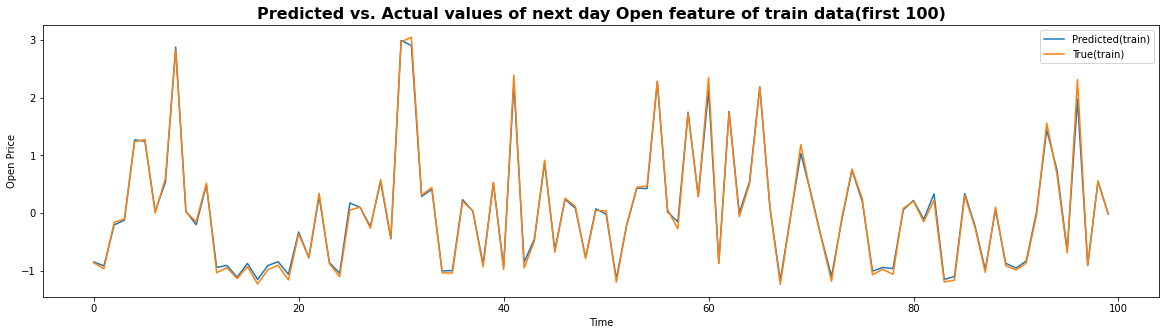

In [519]:
pred_train = model.predict(x_train)
plt.figure(figsize=(20,5))
plt.plot(pred_train[:100], label= 'Predicted(train)')
plt.plot(y_train[:100],label='True(train)')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.title('Predicted vs. Actual values of next day Open feature of train data(first 100)', fontsize=16, fontweight='bold')
plt.show()

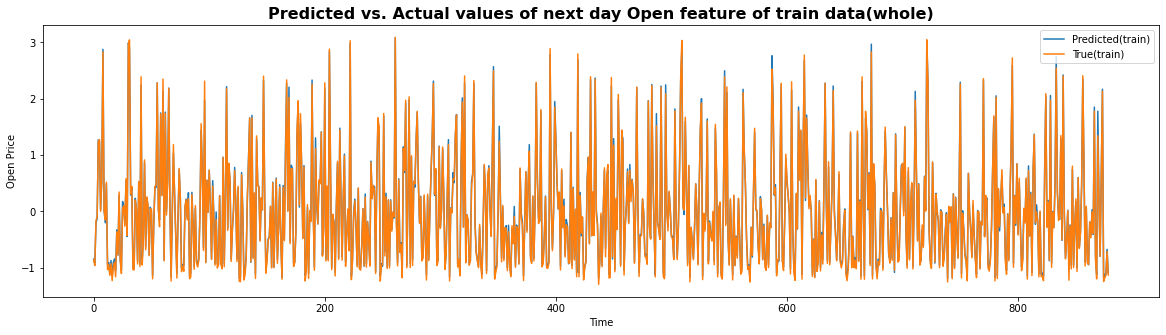

In [520]:
plt.figure(figsize=(20,5))
plt.plot(pred_train, label= 'Predicted(train)')
plt.plot(y_train,label='True(train)')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.title('Predicted vs. Actual values of next day Open feature of train data(whole)', fontsize=16, fontweight='bold')
plt.show()

### Test  Data:

In [521]:
## preprocessing the test data
x_test = preprocess(x_test)
y_test = scale(y_test)

## Train the test data network
history_test=model.fit(x_test,y_test,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
12/12 - 0s - loss: 0.0213
Epoch 2/100
12/12 - 0s - loss: 0.0216
Epoch 3/100
12/12 - 0s - loss: 0.0187
Epoch 4/100
12/12 - 0s - loss: 0.0210
Epoch 5/100
12/12 - 0s - loss: 0.0204
Epoch 6/100
12/12 - 0s - loss: 0.0238
Epoch 7/100
12/12 - 0s - loss: 0.0184
Epoch 8/100
12/12 - 0s - loss: 0.0171
Epoch 9/100
12/12 - 0s - loss: 0.0213
Epoch 10/100
12/12 - 0s - loss: 0.0200
Epoch 11/100
12/12 - 0s - loss: 0.0202
Epoch 12/100
12/12 - 0s - loss: 0.0250
Epoch 13/100
12/12 - 0s - loss: 0.0216
Epoch 14/100
12/12 - 0s - loss: 0.0229
Epoch 15/100
12/12 - 0s - loss: 0.0210
Epoch 16/100
12/12 - 0s - loss: 0.0213
Epoch 17/100
12/12 - 0s - loss: 0.0183
Epoch 18/100
12/12 - 0s - loss: 0.0204
Epoch 19/100
12/12 - 0s - loss: 0.0219
Epoch 20/100
12/12 - 0s - loss: 0.0281
Epoch 21/100
12/12 - 0s - loss: 0.0221
Epoch 22/100
12/12 - 0s - loss: 0.0182
Epoch 23/100
12/12 - 0s - loss: 0.0207
Epoch 24/100
12/12 - 0s - loss: 0.0182
Epoch 25/100
12/12 - 0s - loss: 0.0195
Epoch 26/100
12/12 - 0s - loss: 0.

### Evaluating the process data:

In [523]:
test_evaluation = model.evaluate(x_test,y_test,batch_size=32)
print('The loss while evaluation of test data is: ',test_evaluation)

12/12 [==============================] - 4s 8ms/step - loss: 0.0045
The loss while evaluation of test data is:  0.004515213891863823


## Output of test data:
Here, test data covereges till 0.01 that is the even less loss than training data. Thus, it performs slightly better than training one. Also, the below plots are showing the similarilty of data. it is overlapping means , it is predicting correctly. Also, here loss during evaluation is founs as 0.0045. even less than the loss where test model coverges. Therefore, test dataset performs a bit better than train dataset, as visible from the predictions and graph.

### Predicting the test values:

In [524]:
pred_test= model.predict(x_test)

### Plotting and comapring True vs. Predicted test data target values:

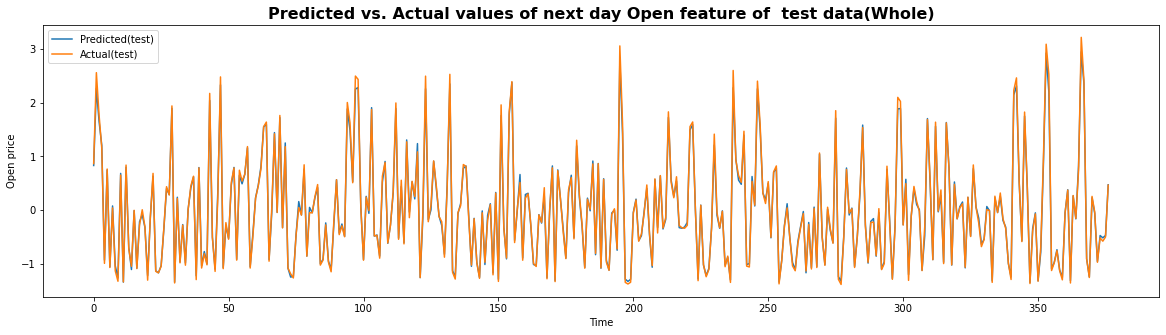

In [525]:
plt.figure(figsize=(20,5))
plt.plot(pred_test, label= 'Predicted(test)')
plt.plot(y_test,label='Actual(test)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Open price')
plt.title('Predicted vs. Actual values of next day Open feature of  test data(Whole)', fontsize=16, fontweight='bold')
plt.show()

### Using more days as features:

### Data preparation:

In [526]:
# Creating dataset with past days as 30 and future prediction for day as 1
x_data_more , y_data_more = create_data(df,30,1)

# Splitting it into same 70-30 ratio
x_train_more , x_test_more , y_train_more ,y_test_more =train_test_split(x_data_more,y_data_more,test_size=0.3, random_state=42)

# Preprocessing the features 
x_train_more = preprocess(x_data_more)

# scaling the target price value
y_train_more = scale(y_data_more)

### Model Building for more days:

In [533]:
model_more=Sequential()
model_more.add(LSTM(64,activation='relu',input_shape=(x_train_more.shape[1],x_train_more.shape[2]),return_sequences=True))
# model_more.add(Dropout(0.2))
model_more.add(LSTM(32,activation='relu',return_sequences=False))
model_more.add(Dropout(0.2))

model_more.add(Dense(y_train_more.shape[1]))
model_more.compile(loss='mse',optimizer='adam')
model_more.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 30, 64)            17664     
_________________________________________________________________
lstm_91 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_47 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


## Training model for more days:
In training for more days , it didnt converge as significantely as training for 3 days. Also, it started from 0.2 instead of 0.6 as in the case for three days. Furthermore, its loss values fluctuate between 0.02 and 0.03 even after 100 epochs, whereas, in case of 3 days, it converged after 10 epochs. Thus, in this case the less days model convered earlier or learmed faster as compared to the model with 30 or more days. It is visible from the graph , that even after large epochs it convered near 0.03. It may because of more features , as in case of there are twelwe features for data, but here there are , 30*4 = 120 features for data. So, more the features , less the accuracy in most cases. Apart from this , everything varies from data to data.

In [534]:
more_days=model_more.fit(x_train_more,y_train_more,epochs=100,batch_size=32,verbose=2)

Epoch 1/100
39/39 - 124s - loss: 0.2898
Epoch 2/100
39/39 - 3s - loss: 0.0582
Epoch 3/100
39/39 - 2s - loss: 0.0496
Epoch 4/100
39/39 - 1s - loss: 0.0451
Epoch 5/100
39/39 - 1s - loss: 0.0411
Epoch 6/100
39/39 - 1s - loss: 0.0433
Epoch 7/100
39/39 - 1s - loss: 0.0391
Epoch 8/100
39/39 - 1s - loss: 0.0369
Epoch 9/100
39/39 - 1s - loss: 0.0361
Epoch 10/100
39/39 - 1s - loss: 0.0386
Epoch 11/100
39/39 - 1s - loss: 0.0374
Epoch 12/100
39/39 - 1s - loss: 0.0340
Epoch 13/100
39/39 - 1s - loss: 0.0338
Epoch 14/100
39/39 - 1s - loss: 0.0379
Epoch 15/100
39/39 - 1s - loss: 0.0343
Epoch 16/100
39/39 - 1s - loss: 0.0315
Epoch 17/100
39/39 - 1s - loss: 0.0373
Epoch 18/100
39/39 - 1s - loss: 0.0300
Epoch 19/100
39/39 - 1s - loss: 0.0332
Epoch 20/100
39/39 - 1s - loss: 0.0325
Epoch 21/100
39/39 - 1s - loss: 0.0350
Epoch 22/100
39/39 - 1s - loss: 0.0329
Epoch 23/100
39/39 - 1s - loss: 0.0397
Epoch 24/100
39/39 - 1s - loss: 0.0339
Epoch 25/100
39/39 - 1s - loss: 0.0338
Epoch 26/100
39/39 - 1s - loss: 

### Plotting the training data model loss:

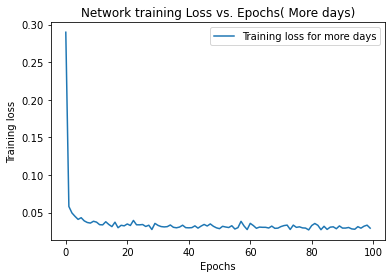

In [536]:
plt.plot(more_days.history['loss'],label='Training loss for more days')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.title('Network training Loss vs. Epochs( More days)')
plt.legend()
plt.show()